In [2]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from itertools import product
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

random_seed = 1
torch.manual_seed(random_seed)
random.seed(random_seed)

data_directory = os.environ.get("EXPERIMENT_DATA") if "EXPERIMENT_DATA" in os.environ else os.getcwd()

# Load dataset

In [13]:
dataset_name1 = "Entacmaea"
train_size = 5000
rf_n_estimators = 100
rf_max_depth = 8

model_name = f"{dataset_name1}_train{train_size}_nest{rf_n_estimators}_depth{rf_max_depth}_seed{random_seed}"
fourier_file1 = f"{data_directory}/rf_fourier/{model_name}.pkl"
rf_file1 = f"{data_directory}/rf_model/{model_name}.pkl"
result_file1 = f"{data_directory}/rf_fourier/result_{model_name}.pkl"

In [18]:
dataset_name2 = "SGEMM"
train_size = 100000
rf_n_estimators = 100
rf_max_depth = 8

model_name = f"{dataset_name2}_train{train_size}_nest{rf_n_estimators}_depth{rf_max_depth}_seed{random_seed}"
fourier_file2 = f"{data_directory}/rf_fourier/{model_name}.pkl"
rf_file2 = f"{data_directory}/rf_model/{model_name}.pkl"
result_file2 = f"{data_directory}/rf_fourier/result_{model_name}.pkl"

# Ablation Experiment

In [66]:
with open(result_file1, 'rb') as handle:
    results1 = pickle.load(handle)
with open(result_file2, 'rb') as handle:
    results2 = pickle.load(handle)


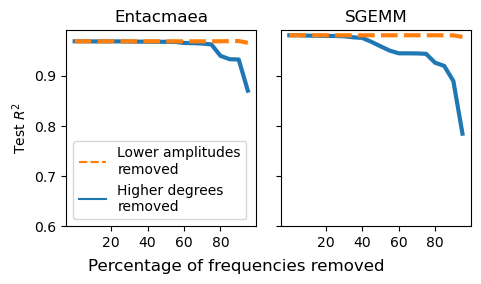

In [67]:
cols = {
    'Percentage of removed frequencies': 'Percentage of removed frequencies', 
    'Higher degrees removed': 'Higher degrees\nremoved', 
    'Lower amplitudes removed': 'Lower amplitudes\nremoved',
}
fig, axes = plt.subplots(1, 2, figsize=(5, 3), sharex=True, sharey=True)
sns.lineplot(pd.DataFrame.from_dict(results1).rename(columns=cols).set_index("Percentage of removed frequencies"), ax=axes[0], linewidth=3)
sns.lineplot(pd.DataFrame.from_dict(results2).rename(columns=cols).set_index("Percentage of removed frequencies"), ax=axes[1], linewidth=3, legend=False)
axes[0].set_ylabel("Test $R^2$")
axes[0].set_title(dataset_name1)
axes[1].set_title(dataset_name2)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_xticks(list(range(20, 100, 20)))
axes[0].set_ylim((0.6, None))

fig.supxlabel("Percentage of frequencies removed", y=0.07)

handles, labels = axes[0].get_legend_handles_labels()
leg = axes[0].legend(handles[::-1], labels[::-1])

fig.tight_layout()
plt.savefig(f"files/ablation/{dataset_name1}_{dataset_name2}.pdf")

In [36]:
pd.DataFrame.from_dict(results1).rename(cols)

,Percentage of removed frequencies,Higher degrees removed,Lower amplitudes removed
0,0,0.968956,0.968956
1,5,0.969024,0.968956
2,10,0.968760,0.968956
3,15,0.968832,0.968956
4,20,0.968823,0.968956
5,25,0.968797,0.968956
6,30,0.968458,0.968956
7,35,0.968320,0.968953
8,40,0.968156,0.968952
9,45,0.968101,0.968956
